In [1]:
import numpy as np # Successfully installed numpy-1.23.5
import pandas as pd # Successfully installed pandas-1.3.5
import matplotlib.pyplot as plt
import seaborn as sns
import os
import networkx as nx


In [2]:
# .. goes up one level in directory
path = r'../datasets/Car-Hacking Dataset/Fuzzy_dataset.csv'
path = r'../datasets/Car-Hacking Dataset/DoS_dataset.csv'
path = r'../datasets/Car-Hacking Dataset/gear_dataset.csv'
path = r'../datasets/Car-Hacking Dataset/RPM_dataset.csv'
df = pd.read_csv(path)
df.columns = ['Timestamp', 'CAN ID','DLC','Data1','Data2','Data3','Data4','Data5','Data6','Data7','Data8', 'label'] 

In [3]:
df['Node'] = df['CAN ID']
df['Edge'] = df['CAN ID'].shift(-1)


In [18]:
graph = df[['Node', 'Edge', 'label']].copy(deep=True)
color = {'R': 'blue',
         'NaN': 'blue',
         'T': 'red'}
graph['color'] = graph['label'].map(color)
# graph = graph[:-1] # omit last row as it doesn't have an edge (or just make it a blank connection)
# graph of the last 200 messages
graph_200 = graph[500:550]# create window size
#graph_200 = graph[1500:1700]
#graph_200 = graph[1450:1650]
# graph_200 = graph[2100:2300]
# graph_200 = graph[1700:1750]
graph_200 = graph[-51:-1]
graph_200['color'] = graph_200['color'].fillna('blue')   
# graph_200 = graph[:-200] # create window size

C:\Users\User1\AppData\Local\Temp\ipykernel_22940\3849748265.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_200['color'] = graph_200['color'].fillna('blue')


In [19]:
graph['label'].value_counts()
graph_200['label'].value_counts()

label
R    49
Name: count, dtype: int64

In [20]:
label_colors = dict(zip(graph_200['Node'], graph_200['color']))

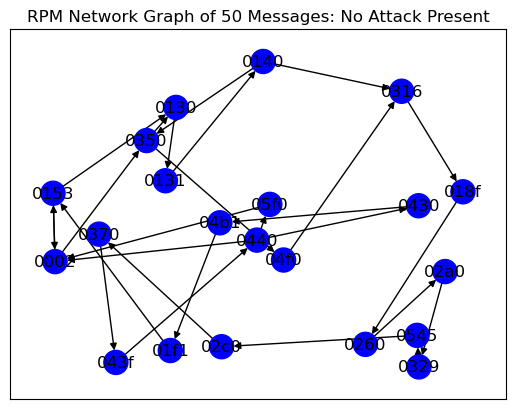

In [21]:
G =  nx.DiGraph()
for index, element in graph_200.iterrows():
    G.add_edge(element['Node'], element['Edge'])

layouts = {'spring' : nx.spring_layout(G, k=1),
           'spiral': nx.spiral_layout(G),
           'spectral': nx.spectral_layout(G),
           'random': nx.random_layout(G),
           'circle': nx.circular_layout(G),
           }


nx.draw_networkx(G, pos=layouts['spring'], with_labels = True, node_color= label_colors.values())
plt.title("RPM Network Graph of 50 Messages: No Attack Present")

plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    embeddings, _ = model(data.x, data.edge_index)  # embeddings shape: [num_nodes, embedding_dim]


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

z = TSNE(n_components=2).fit_transform(embeddings.cpu().numpy())
plt.figure(figsize=(8,8))
plt.scatter(z[:,0], z[:,1], c=data.y.cpu().numpy(), cmap="jet", alpha=0.7)
plt.title("t-SNE visualization of GAT node embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()
